In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
281060,169911.0,1.974763,0.177192,-2.328941,0.721596,0.593716,-0.678492,0.006759,-0.009711,0.601430,...,0.025900,0.282686,-0.002438,0.537421,0.139188,0.679315,-0.049546,-0.016976,12.31,0
256486,157719.0,-0.621228,0.624286,1.403573,-0.188063,0.762375,-0.598682,0.460634,-0.255275,0.012930,...,-0.213793,-0.382271,-0.023781,1.089813,-0.663835,0.125314,-0.134568,-0.023070,7.50,0
227144,144949.0,1.622711,-1.088038,-0.190087,0.459966,-1.010530,0.168725,-0.786584,0.225875,1.483867,...,0.155954,0.255436,0.098385,-0.418895,-0.460703,-0.433263,0.023392,-0.014706,165.00,0
105660,69633.0,1.122470,0.283391,0.582275,1.215417,-0.477178,-1.034619,0.255212,-0.285688,-0.148617,...,0.008507,0.002761,-0.033266,0.739762,0.521197,-0.467988,0.021776,0.039459,49.99,0
203820,134980.0,1.775160,0.040357,-0.338708,3.252702,0.840641,2.618970,-0.946691,0.846541,-0.496890,...,0.257961,0.756808,0.250610,-1.017495,-0.459320,0.083748,0.040670,-0.054936,0.76,0


In [5]:
# Calculate correlation coefficients with the 'Rating' column
correlation = df.corr()['Class'].abs()

# Drop columns with correlation less than 0.3
columns_to_drop = correlation[correlation < 0.03].index
df.drop(columns=columns_to_drop, inplace=True)

In [6]:
set(df["Class"])

{0, 1}

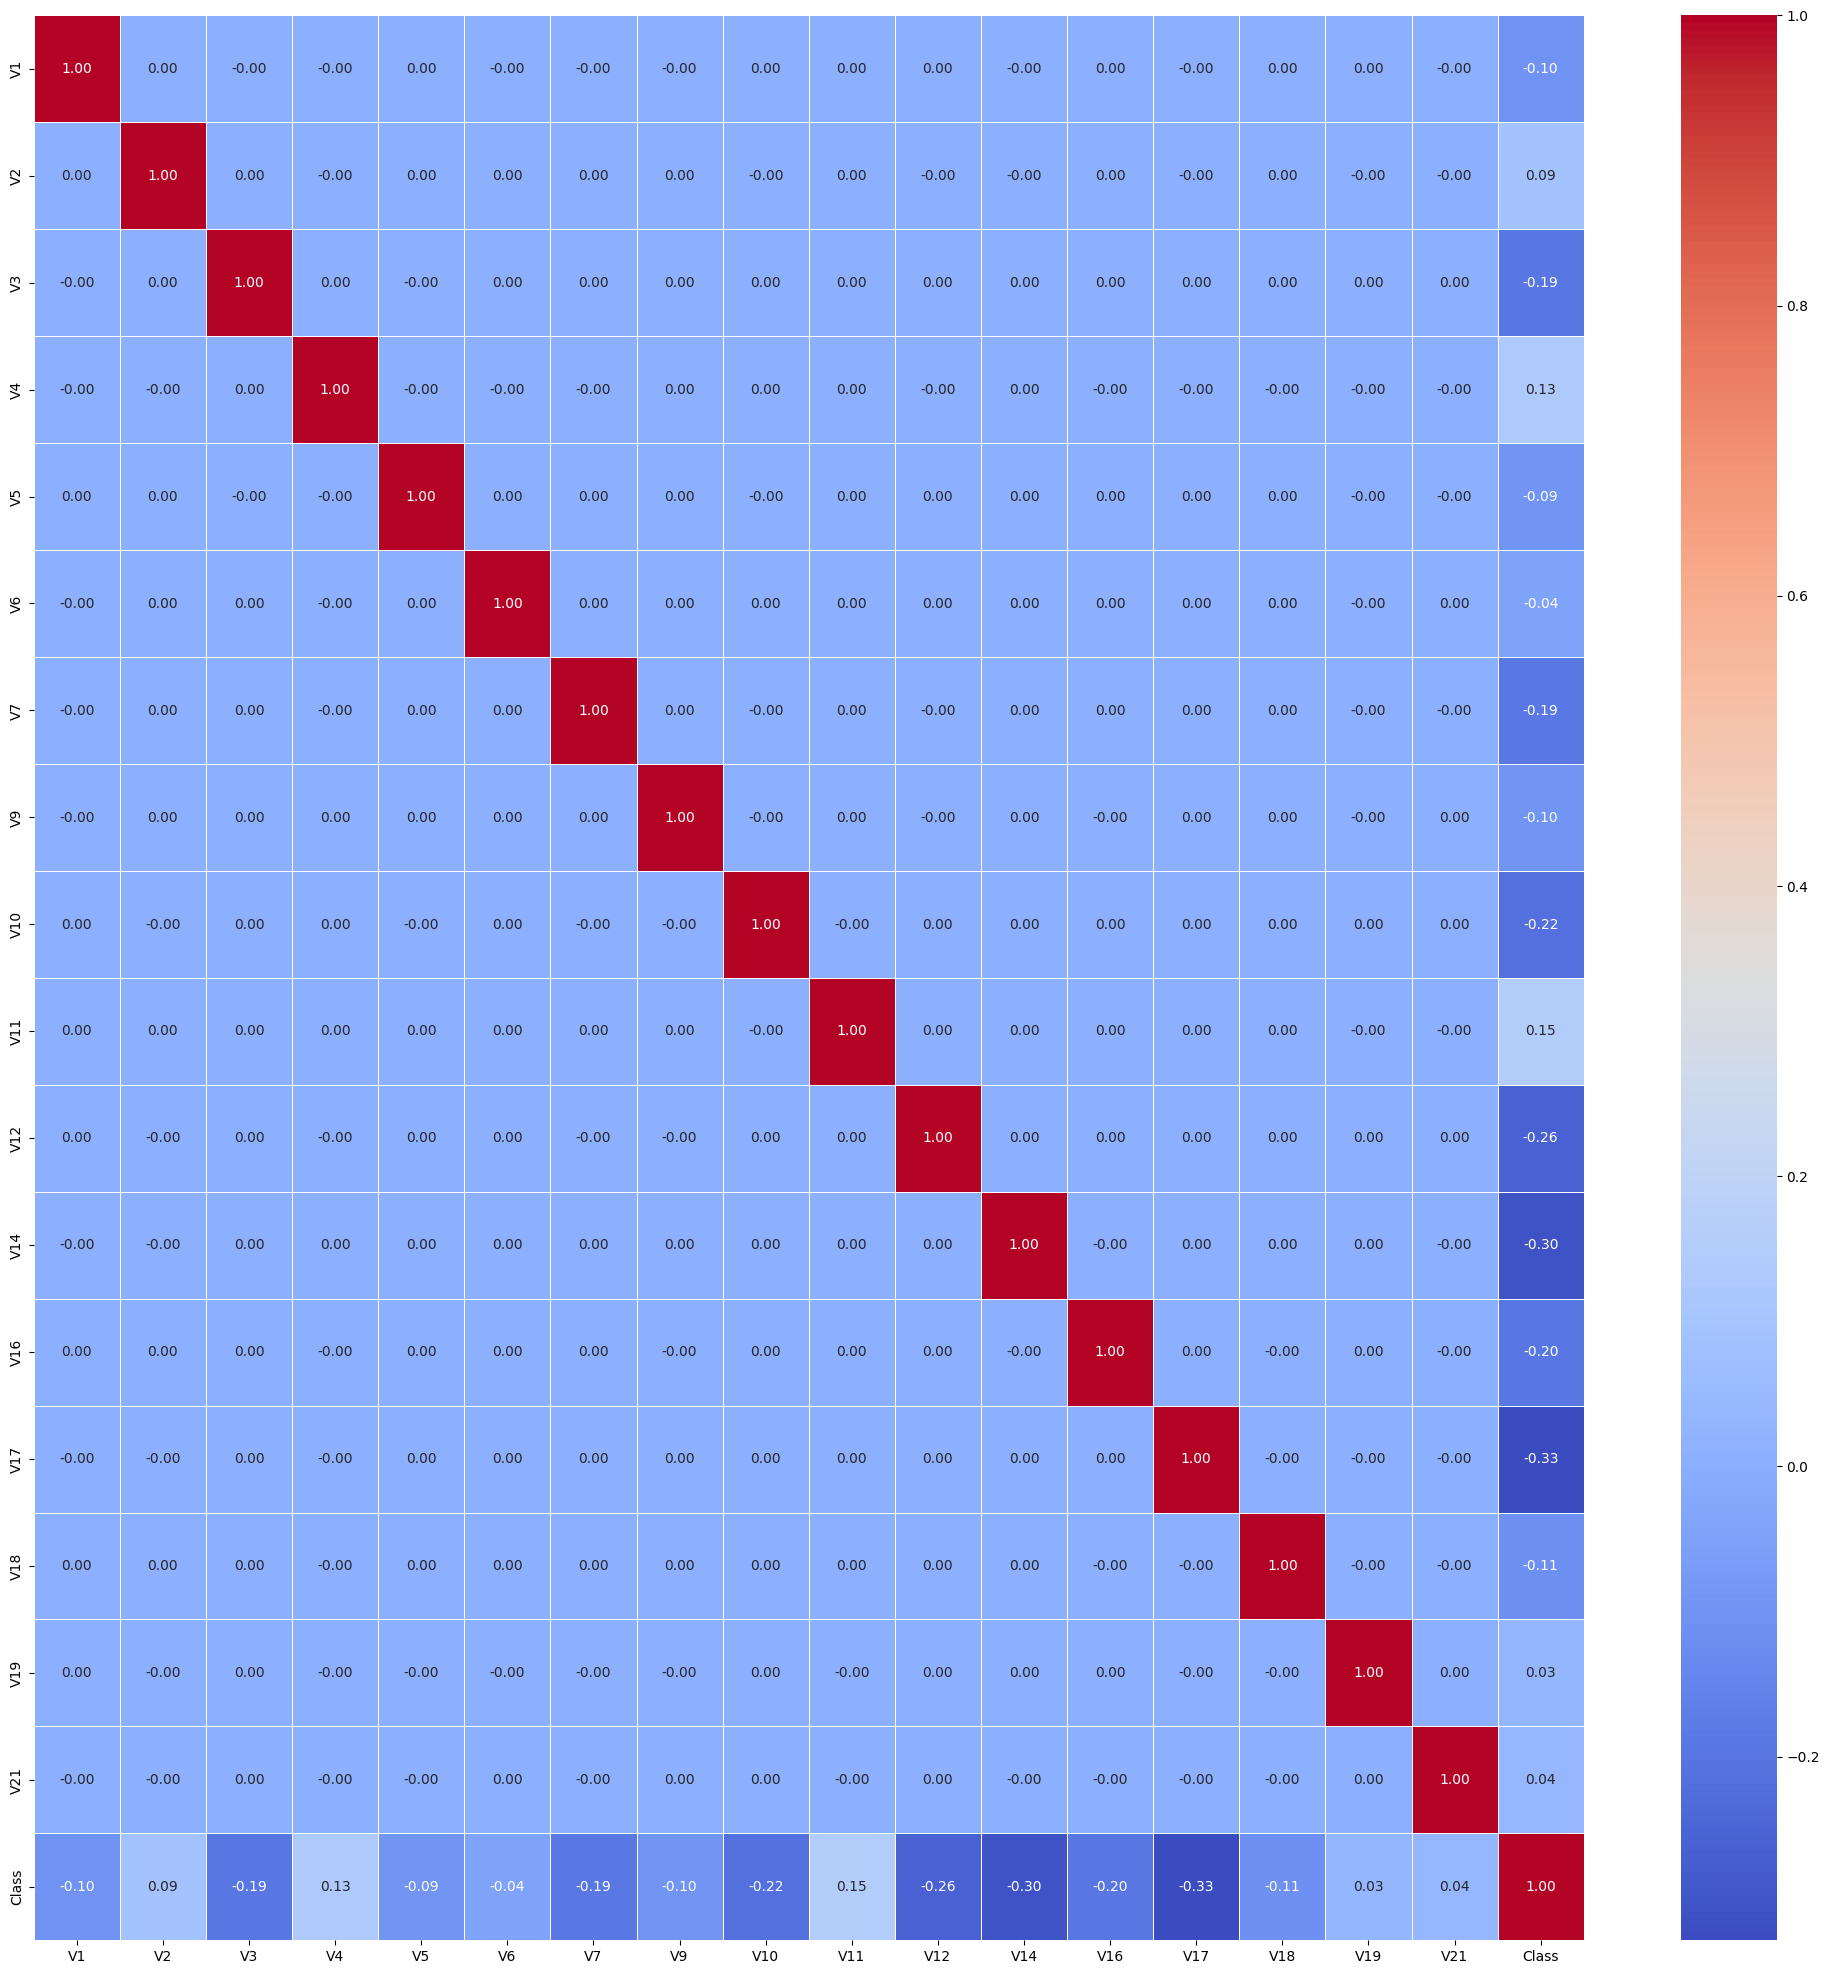

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
df1 = df.select_dtypes(include=["number"])
matrix = df1.corr()

plt.figure(figsize=(25,25))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths='0.5')
plt.show()


In [8]:
x=df.drop(columns="Class")

In [9]:
y=df["Class"]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [12]:
y_pred=model.predict(x_test)

In [13]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9991748885221726